In [1]:
# Importer
import utils
from classes.importer import Importer
from classes.cleaner import Cleaner

# Cleaner
import pandas as pd
import numpy as np

# other
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Loading data

The dataset from [kaggle](https://www.kaggle.com/datasets/wordsforthewise/lending-club) comes into 2 different datasets, one with the accepted loans and the other one with the rejected requests.

I have created an importer object that downloads the data from kaggle and leaves only the csv's, as when downloading the data you get other files and folders.

In [2]:
utils.set_parent_directory_as_working_directory()

# TODO: Move this to a config file
DATA_FOLDER = "./data"
KAGGLE_DATASET_NAME = "wordsforthewise/lending-club"
RAW_DATA_FOLDER_NAME = DATA_FOLDER + "/raw"

# Import the data
importer_name = "importer"
importer =Importer(
    name=importer_name
    , data_folder=DATA_FOLDER
    , kaggle_dataset_name=KAGGLE_DATASET_NAME
    , destination_directory=RAW_DATA_FOLDER_NAME)

#importer.execute()

# 2 Data cleaning
We are just going to work only with the dataset of accepted loans (as they are the only ones we know if they haven't been paid). We need to perform some clening tasks before being able to feed a model with this data.

- Select variables available for an investor before deciding to fund the loan. There are some variables in the dataset that we can only know after the loan has been granted and that therefore can cause a [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/) problems. The description of these variables can be found in [this dictionary](https://www.kaggle.com/datasets/jonchan2003/lending-club-data-dictionary?select=Lending+Club+Data+Dictionary+Approved.csv)

- Missing values

Let's see step by step what the execute method do for the cleaner object


In [3]:
RAW_DATA_PATH  = RAW_DATA_FOLDER_NAME + "/accepted_2007_to_2018Q4.csv"
CLEAN_DATA_FOLDER_NAME = DATA_FOLDER + "/clean"

cleaner_name = "cleaner"
columns_to_keep =  pd.read_csv('src/available_features.csv')
columns_to_keep = columns_to_keep['features'].tolist()
columns_to_change = {
    "issue_d": "datetime64"
}

cleaner = Cleaner(
    name=cleaner_name
    , raw_data_path = RAW_DATA_PATH 
    , columns_to_keep = columns_to_keep
    , destination_directory = CLEAN_DATA_FOLDER_NAME
    , dict_columns_dtypes=columns_to_change
    , null_threshold=30
    , max_corr=0.75)

#cleaner.execute()

## 2.1 Variables available
As previously mentioned, here I am just going to use those variables that I understand that would be available at the time of accepting or not a loan.

In [4]:
cleaner.load_data(RAW_DATA_PATH)
cleaner._keep_columns(columns_to_keep)
cleaner.check_data()

c:\Users\Asus\Desktop\TFM\TFM_MLOps\mlflow_project\src\classes\cleaner.py:31: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_data_path)


Data loaded from ./data/raw/accepted_2007_to_2018Q4.csv
Columns kept ['addr_state', 'annual_inc', 'annual_inc_joint', 'application_type', 'desc', 'emp_title', 'fico_range_high', 'fico_range_low', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'member_id', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'url', 'verification_status', 'verification_status_joint', 'zip_code', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_

,Data Types,Null Percentages,0,1,2
addr_state,object,0.001460,PA,SD,IL
annual_inc,float64,0.001637,55000.0,65000.0,63000.0
annual_inc_joint,float64,94.660506,NaN,NaN,71000.0
application_type,object,0.001460,Individual,Individual,Joint App
desc,object,94.423544,NaN,NaN,NaN
emp_title,object,7.387178,leadman,Engineer,truck driver
fico_range_high,float64,0.001460,679.0,719.0,699.0
fico_range_low,float64,0.001460,675.0,715.0,695.0
home_ownership,object,0.001460,MORTGAGE,MORTGAGE,MORTGAGE
id,object,0.000000,68407277,68355089,68341763


issue_d is an important feature and we need to have it as datetime format

In [5]:
cleaner._convert_columns_to_datatype({'issue_d': 'datetime64'})


Column issue_d converted to datetime64


## 2.2 Missing values

We are going to drop any column with more than 30% of missing values, and any row with nulls in either loan_status or issue_d as teh first one is the objective variable and the second is the variable we need to divide the dataset into periods

In [6]:
cleaner._drop_columns_nulls(30)

Columns with null percentages higher than 30 dropped.


## 2.3 Highly correlated features

We are goin to drop highly correlated features and keep only one of them

c:\Users\Asus\Desktop\TFM\TFM_MLOps\mlflow_project\src\classes\cleaner.py:135: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = self.data.corr()


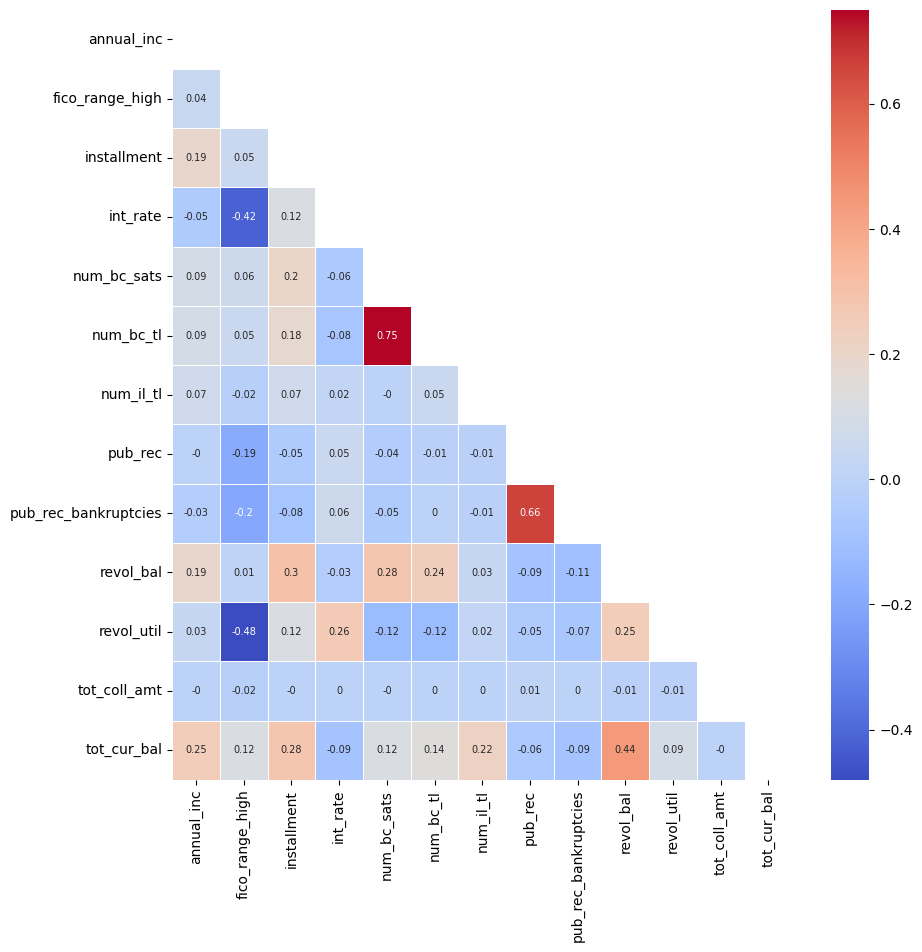

In [9]:
cleaner.corr_heatmap()

We can see some high correlated features, I am going to use a threshold of +/- 0.75 in the pearson correlation index to drop one of the features 

In [8]:
cleaner._drop_high_correlation_vars(0.75)

c:\Users\Asus\Desktop\TFM\TFM_MLOps\mlflow_project\src\classes\cleaner.py:124: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.data.corr().abs()


Columns with correlation higher than 0.75 dropped.


## 2.4 Saving data

In [10]:
cleaner.save_data(CLEAN_DATA_FOLDER_NAME)

Data saved to ./data/clean


# 3 Feature engineering